# Copy Covid-19 Logistics Model

Covid-19 infection in Italy. Mathematical models and predictions

https://towardsdatascience.com/covid-19-infection-in-italy-mathematical-models-and-predictions-7784b4d7dd8d

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
#%matplotlib inline

In [2]:
#url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
df = pd.read_csv(url)
df2 = df.loc[(df["Country/Region"] == "Hungary"),'3/13/20':]
#df2.loc[:,'3/23/20']= [167];
df2 = df2.assign(next = [21]) 
#df2.drop(df.iloc[:, 62:], inplace = True, axis = 1) 
df2

,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,next
129,19,30,32,39,50,58,73,85,103,131,...,187,226,261,300,343,408,447,492,525,585


In [3]:
def logistic_model(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))
x = list(np.arange(73,df2.shape[1]+73))

#x = list(df2.columns.to_series())
y = list(df2.iloc[0,:])
x

[73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93]

In [4]:
fit = curve_fit(logistic_model,x,y,p0=[5,100,100000], maxfev=30000, method='dogbox')
#fit = curve_fit(logistic_model,x,y,p0=[5,95,100000], maxfev=10000)
fit

(array([  4.47321265,  89.61022096, 850.96283688]),
 array([[1.15577762e-02, 3.27974794e-02, 2.83578543e+00],
        [3.27974794e-02, 1.08760458e-01, 9.48746449e+00],
        [2.83578543e+00, 9.48746449e+00, 8.41015055e+02]]))

In [5]:
errors = [np.sqrt(fit[1][i][i]) for i in [0,1,2]]
errors

[0.10750709813943081, 0.329788504890046, 29.000259569260006]

````
def exponential_model(x,a,b,c):
    return a*np.exp(b*(x-c))
exp_fit = curve_fit(exponential_model,x,y,p0=[1,1,1])
exp_fit
````

In [6]:
a=fit[0][0]
b=fit[0][1]
c=fit[0][2]
print(a, b, c)
sol = int(fsolve(lambda x : logistic_model(x,a,b,c) - int(c),b))
sol

4.473212652684247 89.61022095660039 850.9628368816336


119

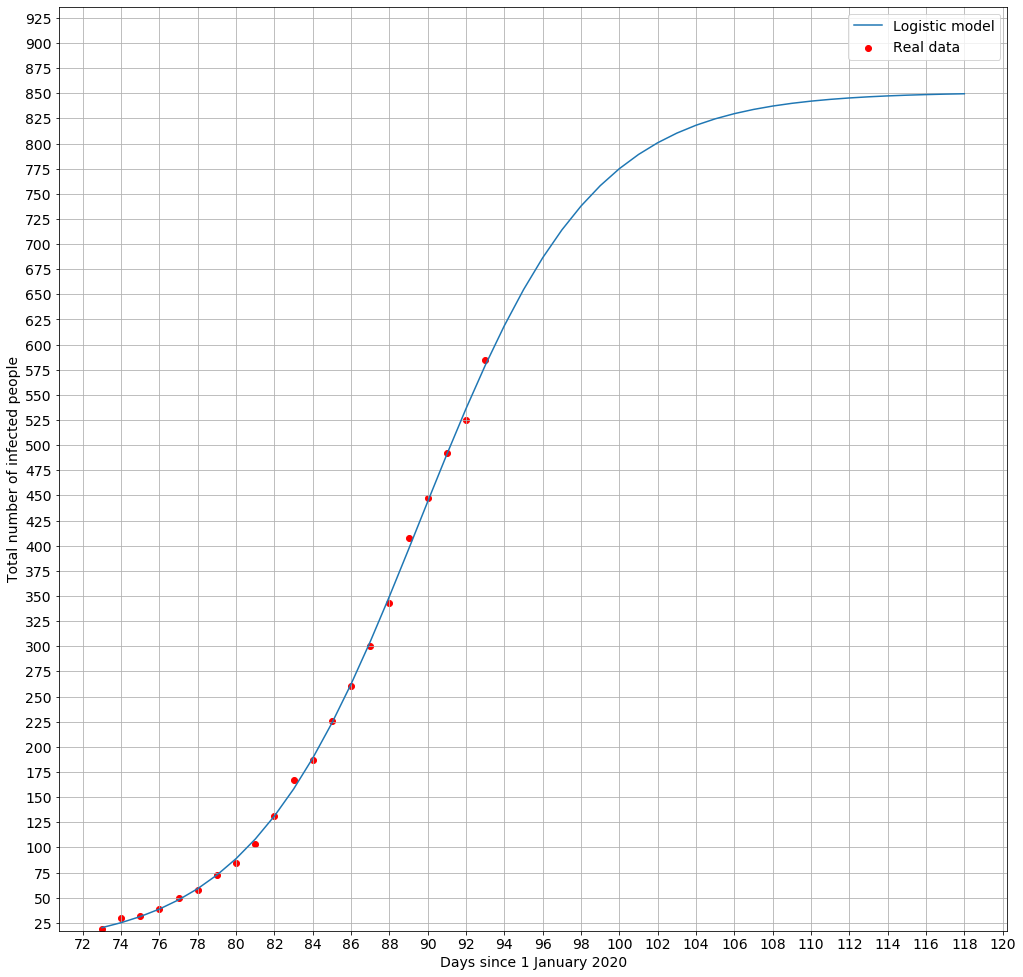

In [7]:
pred_x = list(range(max(x),sol))
plt.rcParams['figure.figsize'] = [17, 17]
plt.rc('font', size=14)
# Real data
plt.scatter(x,y,label="Real data",color="red")
# Predicted logistic curve
plt.plot(x+pred_x, [logistic_model(i,fit[0][0],fit[0][1],fit[0][2]) for i in x+pred_x], label="Logistic model" )
# Predicted exponential curve
# plt.plot(x+pred_x, [exponential_model(i,exp_fit[0][0],exp_fit[0][1],exp_fit[0][2]) for i in x+pred_x], label="Exponential model" )
plt.legend()
plt.xlabel("Days since 1 January 2020")
plt.ylabel("Total number of infected people")
plt.ylim((min(y)*0.9,c*1.1))
#plt.yscale('log')
plt.locator_params(tight=True, nbins=40)
plt.grid(True, animated = True)
plt.show()